<a href="https://colab.research.google.com/github/jtorom/jtorom/blob/develop/Rocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importaci n Libreria de Google Drive
from google.colab import drive
#Acceso al directorio de Drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis')
#Descarga de las librerias de Mask RCNN de matterport
#!git clone https://github.com/matterport/Mask_RCNN
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN'):
  !git clone https://github.com/masc-it/Mask-RCNN.git


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd Mask-RCNN
#!pip list
!pip3 install -r requirements.txt
!python3 setup.py install

/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN
ERROR: Could not find a version that satisfies the requirement numpy==2.19.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0rc1, 1.24.0rc2, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4, 1.25.0rc1, 1.25.0, 1.25.1, 1.25.2, 1.26.0b1, 1.

In [3]:
#Descarga de la matriz de pesos COCO.h5
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/cocoapi'):
  !git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../


/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation]8;;]
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)


from tensorflow.python.client import device_lib
with tf.device('/device:GPU:0'):
  print('Hola GPU')



Hola GPU


In [5]:
import skimage as ski
print(ski.__version__)
with tf.device('/device:GPU:0'):
  if not (ski.__version__=="0.16.2"):
    !pip uninstall --yes scikit-image
    !pip install scikit-image==0.16.2
    os.kill(os.getpid(), 9)


0.16.2


In [6]:

import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import imgaug
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import datetime

In [7]:
ROOT_DIR = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis')

sys.path.append(ROOT_DIR)

In [8]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/')
from mrcnn.config import Config
from mrcnn import utils
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/Mask-RCNN/mrcnn/')
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
%matplotlib inline

In [9]:

# Directorio donde se guaradaran los logs y los modelos de entrenamiento [en root dir- logs]
MODEL_DIR = os.path.abspath('/content/logs')

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)


# Directorio donde se guardara el archivo de pesos COCO.h5
COCO_MODEL_PATH = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/logs/mask_rcnn_coco.h5')


In [10]:
# Se comprueba que se haya descargado correctamente el archivo COCO.h5
if os.path.exists(os.path.join(COCO_MODEL_PATH)):
  print("coco model exist")
%cd /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis
!ls

coco model exist
/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis
 8433365521_9252889f9a_z.jpg			    events.out.tfevents.1700080742.48232b430e14
 ColorPanoptic.png				   'Kaggle y Maskrcnn.ipynb'
 convnext_large_kmax_deeplab_coco_train_unlabeled   logs
 data						    Mask-RCNN
 DeeepLab_COCO.py				    mask_rcnn_coco.h5
 DeepLab_COCO.ipynb				    sample2.jpg
 deeplabv3_xception_tf_dim_ordering_tf_kernels.h5   sphx_glr_plot_visualization_utils_001.png


In [11]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
DATA_DIR = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/')

In [12]:
#Craci n de los directorios de validaci n , test y train
os.chdir('/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/')
DATASET_TRAIN_DIR=os.path.join(DATA_DIR,'Train')
DATASET_VAL_DIR=os.path.join(DATA_DIR,'Validation')
DATASET_TEST_DIR=os.path.join(DATA_DIR,'Test')


#Crea com una configuraci n a partir de tensorflow, ConfigProto()
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



In [13]:
path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train'
imageSize = [350, 536]
sizeEpochSteps = 55 ##mismo valor que la cantidad de img en train

def ajustarTamano(path):
  os.chdir(path)
  for i,f in enumerate(os.listdir('.')):

    file_name, file_extension = os.path.splitext(f)
    #print(file_extension)
    if os.path.isfile(f) and file_extension=='.jpg':

      image_path_jpg = f
      #print(image_path_jpg)
      img = tf.io.read_file(image_path_jpg)
      #print(img.get_shape().as_list()) # []
      img = tf.image.decode_jpeg(img)
      #print(img.get_shape().as_list())
      img_resized = tf.image.resize(img, (imageSize))
      img_resized = img_resized.eval(session=session)
      #print(type(img_resized))
      img_resized_tensor = tf.reshape(img_resized, [imageSize[0], imageSize[1]] )
      img_resized = img_resized_tensor.eval(session=session)
      cv2.imwrite(f, img_resized)


#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train'
#ajustarTamano(path)
#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Test'
#ajustarTamano(path)
#path='/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation'
#ajustarTamano(path)

In [14]:
#Creacin de las clases partiendo de config
class Rocks(Config):
  # Definici n de la clase general
  NAME ="rock_Data"
  # Se ajusta n mero de imagenes a cada GPU.
  IMAGES_PER_GPU = 1
  # Defino n m e r o de clases incluyendo el background
  NUM_CLASSES = 2 #Background + rock"
  # Numero de steps por cada epoca
  STEPS_PER_EPOCH = sizeEpochSteps # Se pone el mismo n mero de imagenes que hay en la carpeta Train
  # Precisi n del sistema (en el proceso de validaci n)
  DETECTION_MIN_CONFIDENCE = 0.75
  # MiniMask
  USE_MINI_MASK = True
  IMAGE_SHAPE = imageSize
  BATCH_SIZE =10
  LEARNING_RATE=0.005

In [15]:
config = Rocks()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.75
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.005
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [16]:
from PIL import Image,ImageDraw
axis_Width = 15

In [17]:
#Hereda de la clase Dataset en el fichero utils.
class RocksDataset(utils.Dataset):

  def load_dataset(self, dataset_dir):

    self.add_class('dataset', 1, 'rock')

    for i, filename in enumerate(os.listdir(dataset_dir)):
      annotation_file = os.path.join(dataset_dir , filename.replace('.jpg', '.json'))
      if '.jpg' in filename and os.path.isfile(annotation_file):
        self.add_image('dataset',image_id=i,path=os.path.join(dataset_dir , filename),annotation=annotation_file)

  def extract_masks(self, filename):
    json_file = os.path.join(filename) #Devuelve el nombre del fichero con string->’.
    with open(json_file) as f:
      img_anns = json.load(f)
    n_masks = 0
    for anno in img_anns['shapes']:
      if anno['label']=='rock':
        n_masks+=1#
    masks = np.zeros([img_anns['imageHeight'], img_anns['imageWidth'], n_masks], dtype='uint8')
    classes = []#
    i=0
    for anno in img_anns['shapes']:
      if anno['label']=='rock':
        mask = np.zeros([img_anns['imageHeight'], img_anns['imageWidth']], dtype=np.uint8)
        cv2.fillPoly(mask, np.array([anno['points']], dtype=np.int32), 1)
        masks[:, :, i] = mask
        classes.append(self.class_names.index(anno['label']))
        i+=1
    return masks , classes

  # Carga las m scaras para una imagen
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    masks, classes = self.extract_masks(path)
    return masks, np.asarray(classes, dtype='int32')

  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info['path']




In [18]:
dataset_train = RocksDataset()
dataset_train.load_dataset(DATASET_TRAIN_DIR)
dataset_train.prepare()


In [19]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
  print("{:3}. {:50}".format(i, info['name']))


Image Count: 55
Class Count: 2
  0. BG                                                
  1. rock                                              


In [20]:
# Validation set
dataset_val = RocksDataset()
dataset_val.load_dataset(DATASET_VAL_DIR)
dataset_val.prepare()

In [21]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
  print("{:3}. {:50}".format(i, info['name']))

Image Count: 13
Class Count: 2
  0. BG                                                
  1. rock                                              


In [22]:
#Test set
dataset_test = RocksDataset()
dataset_test.load_dataset(DATASET_TEST_DIR)
dataset_test.prepare()
print('Test: %d images' % len(dataset_test.image_ids))

Test: 13 images


In [23]:
#Para comprobar que las imagenes se han cargado bien
print("Image Count: {}".format(len(dataset_test.image_ids)))
print("Class Count: {}".format(dataset_test.num_classes))
for i, info in enumerate(dataset_test.class_info):
  print("{:3}. {:50}".format(i, info['name']))


Image Count: 13
Class Count: 2
  0. BG                                                
  1. rock                                              


{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


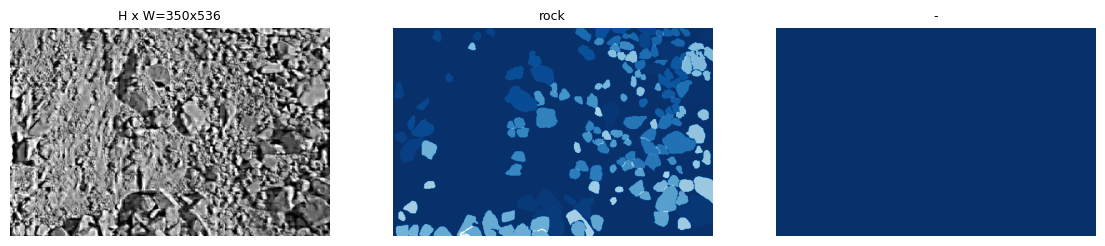

{'id': 2, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_144239.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_144239.json'}


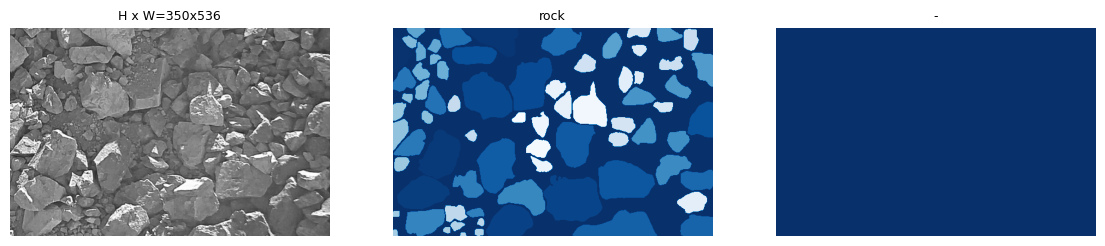

{'id': 1, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103304.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103304.json'}


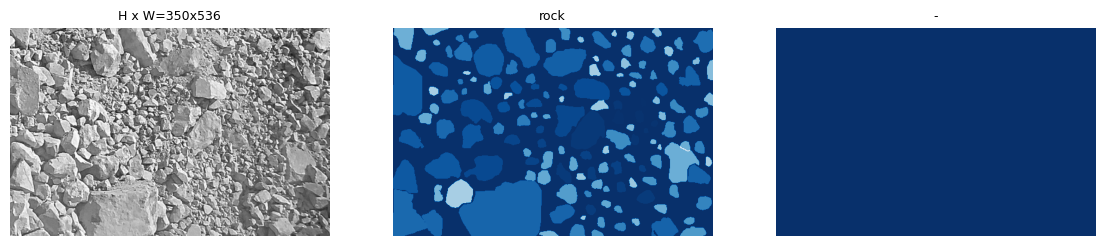

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}


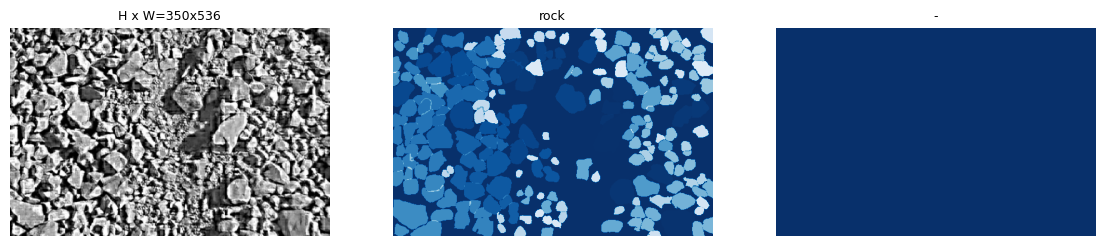

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


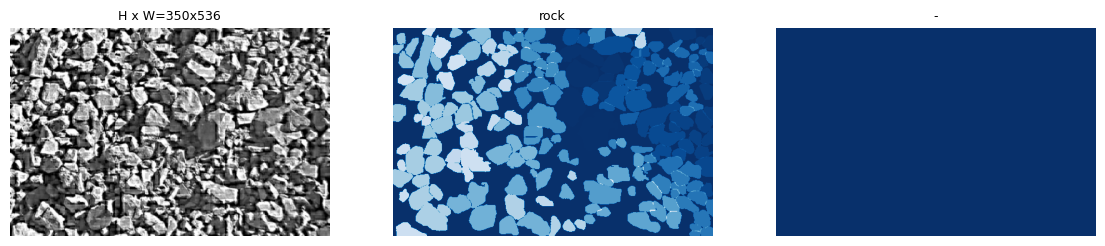

In [24]:
#Selecciona 5 im genes aleatorias i las visualiza con sus correspondientes m scaras
image_ids=np.random.choice(dataset_train.image_ids,5)
for image_id in image_ids:
  image = dataset_train.load_image(image_id)
  mask, class_ids = dataset_train.load_mask(image_id)
  visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names,2)





In [25]:
# Crea el modelo del tarining mode
model = modellib.MaskRCNN(mode="training", config=config , model_dir=MODEL_DIR)
#model.find_last()

In [26]:
#Selecci n de las matrices de peso (coco o la ltima conseguida)
init_with = "coco"

In [27]:
if init_with == "imagenet":
  model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
  #Excluyo par metros que no me interesan
  model.load_weights(COCO_MODEL_PATH, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
  model.load_weights(model.find_last(), by_name=True)
  !pip list


In [28]:
Rock_augmentation = imgaug.augmenters.Sometimes(0.8,[imgaug.augmenters.geometric.Affine(rotate=(-360,360))])


In [ ]:

hora_actual = datetime.datetime.now()
print(hora_actual)

with tf.device('/device:GPU:0'):
  model.train(
        dataset_train
      , dataset_val
      , learning_rate=config.LEARNING_RATE
      , epochs=6
      , layers='heads'
      , augmentation = Rock_augmentation
      )

print(hora_actual)

2023-11-19 00:08:21.143186

Starting at epoch 0. LR=0.005

Checkpoint Path: /content/logs/rock_data20231119T0008/mask_rcnn_rock_data_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
m

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Workers
2
{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.json'}{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.json'}

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
 6/55 [==>...........................] - ETA: 18s - batch: 2.5000 - size: 1.0000 - loss: 3.2113 - rpn_class_loss: 0.6602 - rpn_bbox_loss: 0.4662 - mrcnn_class_loss: 0.7885 - mrcnn_bbox_loss: 0.6986 - mrcnn_mask_loss: 0.5978

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 69, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.json'}
{'id': 69, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.json'}
 8/55 [===>..........................] - ETA: 6:21 - batch: 3.5000 - size: 1.0000 - loss: 3.0693 - rpn_class_loss: 0.6195 - rpn_bbox_loss: 0.4671 - mrcnn_class_loss: 0.7652 - mrcnn_bbox_loss: 0.6614 - mrcnn_mask_loss: 0.5561

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
10/55 [====>.........................] - ETA: 5:30 - batch: 4.5000 - size: 1.0000 - loss: 2.8832 - rpn_class_loss: 0.5656 - rpn_bbox_loss: 0.4433 - mrcnn_class_loss: 0.7461 - mrcnn_bbox_loss: 0.6172 - mrcnn_mask_loss: 0.5110

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
12/55 [=====>........................] - ETA: 6:17 - batch: 5.5000 - size: 1.0000 - loss: 2.8330 - rpn_class_loss: 0.5188 - rpn_bbox_loss: 0.4375 - mrcnn_class_loss: 0.7780 - mrcnn_bbox_loss: 0.5930 - mrcnn_mask_loss: 0.5056

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
14/55 [======>.......................] - ETA: 5:36 - batch: 6.5000 - size: 1.0000 - loss: 2.7500 - rpn_class_loss: 0.4901 - rpn_bbox_loss: 0.4395 - mrcnn_class_loss: 0.7598 - mrcnn_bbox_loss: 0.5814 - mrcnn_mask_loss: 0.4793

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
16/55 [=======>......................] - ETA: 5:08 - batch: 7.5000 - size: 1.0000 - loss: 2.6282 - rpn_class_loss: 0.4626 - rpn_bbox_loss: 0.4272 - mrcnn_class_loss: 0.7191 - mrcnn_bbox_loss: 0.5669 - mrcnn_mask_loss: 0.4524

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
20/55 [=========>....................] - ETA: 4:13 - batch: 9.5000 - size: 1.0000 - loss: 2.4142 - rpn_class_loss: 0.4295 - rpn_bbox_loss: 0.4061 - mrcnn_class_loss: 0.6492 - mrcnn_bbox_loss: 0.5184 - mrcnn_mask_loss: 0.4111

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
22/55 [===========>..................] - ETA: 3:47 - batch: 10.5000 - size: 1.0000 - loss: 2.3463 - rpn_class_loss: 0.4085 - rpn_bbox_loss: 0.3954 - mrcnn_class_loss: 0.6306 - mrcnn_bbox_loss: 0.5094 - mrcnn_mask_loss: 0.4024

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
26/55 [=============>................] - ETA: 3:22 - batch: 12.5000 - size: 1.0000 - loss: 2.3853 - rpn_class_loss: 0.4231 - rpn_bbox_loss: 0.4244 - mrcnn_class_loss: 0.5864 - mrcnn_bbox_loss: 0.5266 - mrcnn_mask_loss: 0.4248

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
28/55 [==============>...............] - ETA: 3:09 - batch: 13.5000 - size: 1.0000 - loss: 2.3668 - rpn_class_loss: 0.4114 - rpn_bbox_loss: 0.4268 - mrcnn_class_loss: 0.5837 - mrcnn_bbox_loss: 0.5256 - mrcnn_mask_loss: 0.4192

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
30/55 [===============>..............] - ETA: 3:07 - batch: 14.5000 - size: 1.0000 - loss: 2.3922 - rpn_class_loss: 0.4080 - rpn_bbox_loss: 0.4304 - mrcnn_class_loss: 0.6022 - mrcnn_bbox_loss: 0.5306 - mrcnn_mask_loss: 0.4210

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
32/55 [================>.............] - ETA: 2:56 - batch: 15.5000 - size: 1.0000 - loss: 2.3916 - rpn_class_loss: 0.3975 - rpn_bbox_loss: 0.4304 - mrcnn_class_loss: 0.6061 - mrcnn_bbox_loss: 0.5355 - mrcnn_mask_loss: 0.4222

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
34/55 [=================>............] - ETA: 2:38 - batch: 16.5000 - size: 1.0000 - loss: 2.3513 - rpn_class_loss: 0.3859 - rpn_bbox_loss: 0.4257 - mrcnn_class_loss: 0.5987 - mrcnn_bbox_loss: 0.5241 - mrcnn_mask_loss: 0.4168

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
36/55 [==================>...........] - ETA: 2:18 - batch: 17.5000 - size: 1.0000 - loss: 2.3325 - rpn_class_loss: 0.3805 - rpn_bbox_loss: 0.4236 - mrcnn_class_loss: 0.5918 - mrcnn_bbox_loss: 0.5210 - mrcnn_mask_loss: 0.4157

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
38/55 [===================>..........] - ETA: 2:05 - batch: 18.5000 - size: 1.0000 - loss: 2.3210 - rpn_class_loss: 0.3709 - rpn_bbox_loss: 0.4273 - mrcnn_class_loss: 0.5917 - mrcnn_bbox_loss: 0.5174 - mrcnn_mask_loss: 0.4138

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
40/55 [====================>.........] - ETA: 1:49 - batch: 19.5000 - size: 1.0000 - loss: 2.2945 - rpn_class_loss: 0.3627 - rpn_bbox_loss: 0.4226 - mrcnn_class_loss: 0.5873 - mrcnn_bbox_loss: 0.5107 - mrcnn_mask_loss: 0.4111

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
42/55 [=====================>........] - ETA: 1:36 - batch: 20.5000 - size: 1.0000 - loss: 2.2919 - rpn_class_loss: 0.3593 - rpn_bbox_loss: 0.4191 - mrcnn_class_loss: 0.5917 - mrcnn_bbox_loss: 0.5094 - mrcnn_mask_loss: 0.4125

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
44/55 [=======================>......] - ETA: 1:22 - batch: 21.5000 - size: 1.0000 - loss: 2.2849 - rpn_class_loss: 0.3564 - rpn_bbox_loss: 0.4225 - mrcnn_class_loss: 0.5878 - mrcnn_bbox_loss: 0.5061 - mrcnn_mask_loss: 0.4121

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
46/55 [========================>.....] - ETA: 1:11 - batch: 22.5000 - size: 1.0000 - loss: 2.2807 - rpn_class_loss: 0.3556 - rpn_bbox_loss: 0.4244 - mrcnn_class_loss: 0.5882 - mrcnn_bbox_loss: 0.5013 - mrcnn_mask_loss: 0.4111

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
48/55 [=========================>....] - ETA: 55s - batch: 23.5000 - size: 1.0000 - loss: 2.3185 - rpn_class_loss: 0.3613 - rpn_bbox_loss: 0.4705 - mrcnn_class_loss: 0.5857 - mrcnn_bbox_loss: 0.4945 - mrcnn_mask_loss: 0.4065 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
50/55 [==========================>...] - ETA: 39s - batch: 24.5000 - size: 1.0000 - loss: 2.3180 - rpn_class_loss: 0.3609 - rpn_bbox_loss: 0.4767 - mrcnn_class_loss: 0.5891 - mrcnn_bbox_loss: 0.4881 - mrcnn_mask_loss: 0.4032

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
52/55 [===========================>..] - ETA: 24s - batch: 25.5000 - size: 1.0000 - loss: 2.3132 - rpn_class_loss: 0.3600 - rpn_bbox_loss: 0.4760 - mrcnn_class_loss: 0.5923 - mrcnn_bbox_loss: 0.4836 - mrcnn_mask_loss: 0.4014

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
54/55 [============================>.] - ETA: 8s - batch: 26.5000 - size: 1.0000 - loss: 2.3129 - rpn_class_loss: 0.3604 - rpn_bbox_loss: 0.4799 - mrcnn_class_loss: 0.5919 - mrcnn_bbox_loss: 0.4817 - mrcnn_mask_loss: 0.3990 

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.json'}{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152157.json'}

55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 1.0000 - loss: 2.3101 - rpn_class_loss: 0.3595 - rpn_bbox_loss: 0.4811 - mrcnn_class_loss: 0.5916 - mrcnn_bbox_loss: 0.4802 - mrcnn_mask_loss: 0.3977{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/cont

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 69, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'so

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 20, 'so

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 24, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
55/55 [==============================] - 1424s 25s/step - batch: 27.0000 - size: 1.0000 - loss: 2.3101 - rpn_class_loss: 0.3595 - rpn_bbox_loss: 0.4811 - mrcnn_class_loss: 0.5916 - mrcnn_bbox_loss: 0.4802 - mrcnn_mask_loss: 0.3977 - val_loss: 1.7688 - val_rpn_class_loss: 0.2864 - val_rpn_bbox_loss: 0.3410 - val_mrcnn_class_loss: 0.4660 - val_mrcnn_bbox_loss: 0.3746 - val_mrcnn_mask_loss: 0.3008
Epoch 2/6
54/55 [============================>.] - ETA: 0s - batch: 26.5000 - size: 1.0000 - loss: 1.8957 - rpn_class_loss: 0.2658 - rpn_bbox_loss: 0.4644 - mrcnn_class_loss: 0.5031 - mrcnn_bbox_loss: 0.3296 - mrcnn_mask_loss: 0.3329{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 69, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_095737.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id'

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
55/55 [==============================] - 877s 16s/step - batch: 27.0000 - size: 1.0000 - loss: 1.8978 - rpn_class_loss: 0.2643 - rpn_bbox_loss: 0.4662 - mrcnn_class_loss: 0.5040 - mrcnn_bbox_loss: 0.3303 - mrcnn_mask_loss: 0.3330 - val_loss: 1.7253 - val_rpn_class_loss: 0.2237 - val_rpn_bbox_loss: 0.3123 - val_mrcnn_class_loss: 0.5672 - val_mrcnn_bbox_loss: 0.3272 - val_mrcnn_mask_loss: 0.2949
Epoch 3/6
54/55 [============================>.] - ETA: 0s - batch: 26.5000 - size: 1.0000 - loss: 1.8035 - rpn_class_loss: 0.2155 - rpn_bbox_loss: 0.4530 - mrcnn_class_loss: 0.5223 - mrcnn_bbox_loss: 0.3110 - mrcnn_mask_loss: 0.3017{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id': 24, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id'

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
55/55 [==============================] - 886s 16s/step - batch: 27.0000 - size: 1.0000 - loss: 1.8057 - rpn_class_loss: 0.2149 - rpn_bbox_loss: 0.4537 - mrcnn_class_loss: 0.5238 - mrcnn_bbox_loss: 0.3118 - mrcnn_mask_loss: 0.3016 - val_loss: 1.8728 - val_rpn_class_loss: 0.3370 - val_rpn_bbox_loss: 0.3448 - val_mrcnn_class_loss: 0.5640 - val_mrcnn_bbox_loss: 0.3409 - val_mrcnn_mask_loss: 0.2861
Epoch 4/6
54/55 [============================>.] - ETA: 0s - batch: 26.5000 - size: 1.0000 - loss: 1.7489 - rpn_class_loss: 0.1960 - rpn_bbox_loss: 0.4506 - mrcnn_class_loss: 0.5154 - mrcnn_bbox_loss: 0.2861 - mrcnn_mask_loss: 0.3008{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id'

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 17, 'source

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 24, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
55/55 [==============================] - 894s 17s/step - batch: 27.0000 - size: 1.0000 - loss: 1.7533 - rpn_class_loss: 0.1961 - rpn_bbox_loss: 0.4525 - mrcnn_class_loss: 0.5153 - mrcnn_bbox_loss: 0.2877 - mrcnn_mask_loss: 0.3016 - val_loss: 1.7478 - val_rpn_class_loss: 0.1988 - val_rpn_bbox_loss: 0.3487 - val_mrcnn_class_loss: 0.5460 - val_mrcnn_bbox_loss: 0.3550 - val_mrcnn_mask_loss: 0.2994
Epoch 5/6
54/55 [============================>.] - ETA: 0s - batch: 26.5000 - size: 1.0000 - loss: 1.6070 - rpn_class_loss: 0.1849 - rpn_bbox_loss: 0.3828 - mrcnn_class_loss: 0.4849 - mrcnn_bbox_loss: 0.2632 - mrcnn_mask_loss: 0.2912{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id'

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 24, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
55/55 [==============================] - 892s 17s/step - batch: 27.0000 - size: 1.0000 - loss: 1.6114 - rpn_class_loss: 0.1856 - rpn_bbox_loss: 0.3849 - mrcnn_class_loss: 0.4852 - mrcnn_bbox_loss: 0.2648 - mrcnn_mask_loss: 0.2909 - val_loss: 1.5959 - val_rpn_class_loss: 0.1854 - val_rpn_bbox_loss: 0.3269 - val_mrcnn_class_loss: 0.5393 - val_mrcnn_bbox_loss: 0.2755 - val_mrcnn_mask_loss: 0.2688
Epoch 6/6
54/55 [============================>.] - ETA: 0s - batch: 26.5000 - size: 1.0000 - loss: 1.6822 - rpn_class_loss: 0.2268 - rpn_bbox_loss: 0.4247 - mrcnn_class_loss: 0.4730 - mrcnn_bbox_loss: 0.2677 - mrcnn_mask_loss: 0.2900{'id': 7, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 33, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_114807.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 126) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}
{'id': 27, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_100719.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 93, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 375) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 64) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}
{'id': 94, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_104351.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 223) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 13, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112833.json'}
{'id':

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 94) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 11, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_151534.json'}
{'id': 17, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 129) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}
{'id': 0, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_152530.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 112) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 31, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_111817.json'}
{'id': 30, 'sour

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 66) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}
{'id': 99, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 176) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 32, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_113802.json'}
{'id': 5, 'sourc

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 173) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}
{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id'

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jso

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 72) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}
{'id': 19, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_105658.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 59) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 100, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_113041.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 113) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}
{'id': 106, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_121752.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 86) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your in

{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 8, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112755.json'}
{'id': 17, 'source

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 123) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}
{'id': 101, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112435.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 20, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110623.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 226) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}{'id': 23, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113041.json'}

{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}
{'id': 21, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220419_154600.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_113347.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 24, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220413_092202.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 148) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 15, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103510.json'}
{'id': 92, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_100040.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(
/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 166) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your 

{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}
{'id': 98, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_112641.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}
{'id': 16, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_104808.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 201) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 17, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_110036.json'}
{'id': 104, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Train/SH04_20220414_114512.json'}


/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (1024, 1024, 140) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


In [ ]:
hora_actual = datetime.datetime.now()
print(hora_actual)


In [30]:
with tf.device('/device:GPU:0'):
  model.train(dataset_train , dataset_val , learning_rate=config.LEARNING_RATE / 10,epochs=6, layers="all")


Starting at epoch 6. LR=0.0005

Checkpoint Path: /content/logs/rock_data20231119T0008/mask_rcnn_rock_data_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b   

In [31]:
class InferenceConfig(Rocks):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1


In [32]:
inference_config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", config=inference_config ,model_dir=MODEL_DIR)

Instructions for updating:
Use fn_output_signature instead


In [33]:
model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path , by_name=True)

self.model_dir: /content/logs
Dir_names: ['rock20231118T2220', 'rock_data20231119T0008']
Loading weights from  /content/logs/rock_data20231119T0008/mask_rcnn_rock_data_0005.h5
Re-starting from epoch 5


In [34]:
def get_ax(rows=1, cols=1, size=8):
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

dataset_val.image_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [36]:
image_id=1
original_image , image_meta , gt_class_id ,gt_bbox , gt_mask = modellib.load_image_gt(dataset_val , inference_config , image_id )
#original_image , image_meta , gt_class_id ,gt_bbox , gt_mask = modellib.load_image_gt(dataset_val , inference_config , image_id, use_mini_mask=False)


log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

{'id': 14, 'source': 'dataset', 'path': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103358.jpg', 'annotation': '/content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/data/Validation/SH04_20220414_103358.json'}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  float64
gt_class_id              shape: (178,)                min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (178, 4)              min:  116.00000  max: 1024.00000  int32
gt_mask                  shape: (56, 56, 178)         min:    0.00000  max:    1.00000  bool


---Image---
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
---Boxes---
[[ 588  944  657 1024]
 [ 527  958  582 1002]
 [ 372  944  443 1019]
 [ 186  866  240  912]
 [ 184  915  215  948]
 [ 209  988  238 1024]
 [ 230  971  255 1003]
 [ 265  977  297 1024]
 [ 232  889  261  929]
 [ 213  915  238  946]
 [ 268  868  311  915]
 [ 253  912  311  942]
 [ 353  881  406  923]
 [ 289  940  333  984]
 [ 326  952  360  986]
 [ 387  854  422  889]
 [ 326  826  366  873]
 [ 303  866  335  894]
 [ 314  914  335  940]
 [ 272  820  301  845]
 [ 270  845  303  868]
 [ 358  610  399  657]
 [ 410  652  443  694]
 [ 642  541  697  590]
 [ 682  34

ValueError: ignored

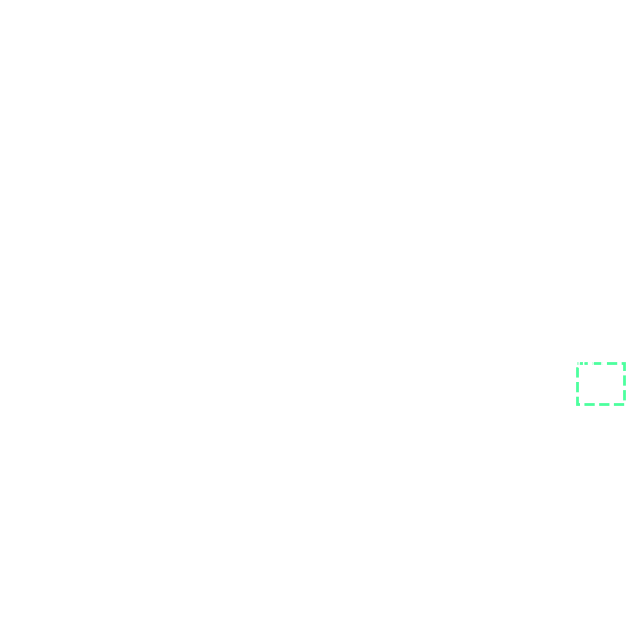

In [37]:
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, dataset_val.class_names, figsize=(8, 8))
print(gt_class_id.shape)

In [38]:
results = model.detect([original_image], verbose=1)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


---Image---
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
---Boxes---
[[350 877 402 927]
 [357 610 401 658]
 [261 868 310 920]
 [616 508 654 544]
 [667 466 718 516]
 [189 861 242 912]
 [656 851 711 900]
 [785 681 844 764]
 [731 829 781 891]]
---masks---
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False Fal

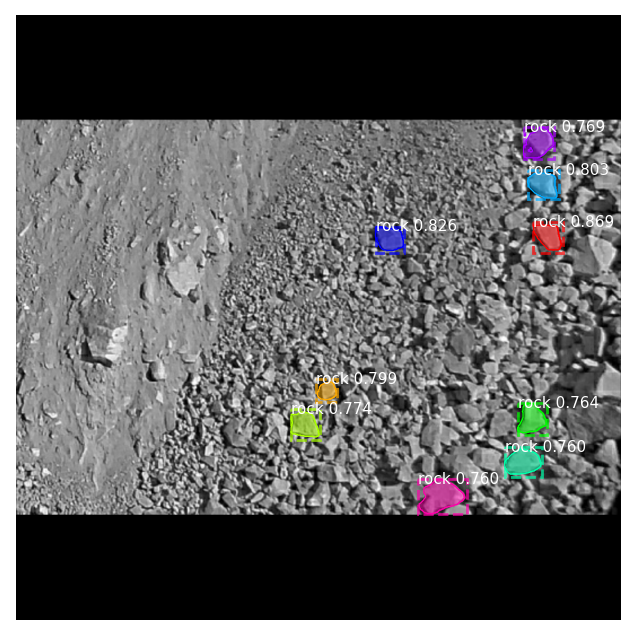

In [39]:
r = results[0]
visualize.display_instances(original_image , r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'], ax=get_ax())
print(r['class_ids'].shape)

In [40]:
from mrcnn import utils
from mrcnn import utils_confusion
import pandas as pd
import numpy as np
import os
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

ImportError: ignored

In [ ]:
for image_id in dataset_test.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
   modellib.load_image_gt(dataset_test, config, image_id, use_mini_mask=False)
  info=dataset_test.image_info[image_id]

  results = model.detect([image], verbose=1)
  r = results[0]

  gt, pred = utils_confusion.gt_pred_lists(gt_class_id,gt_bbox, r['class_ids'],  r['rois'])

  gt_tot = np.append(gt_tot, gt_class_id)
  pred_tot=np.append(pred_tot, pred)

  AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,r['rois'], r['class_ids'], r['scores'], r['masks'])

  print("the actual len of the gt vect is : ", len(gt_tot))
  print("the actual len of the pred vect is : ", len(pred_tot))

  mAP_.append(AP_)

In [ ]:
gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
  os.makedirs(save_dir)
df.to_json(os.path.join(save_dir ,"gt_pred_test.json"))

In [ ]:
print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)
tp,fp,fn=utils_confusion.plot_confusion_matrix_from_data(gt_tot,pred_tot,fz=18, figsize=(20,20), lw=0.5)

In [ ]:
#Se extraen los datos de p r d i d a s y se muestran con el tensorflow
import tensorflow.compat.v1 as tf
%load_ext tensorboard
sess = tf.Session()
path_logs = "/content/logs"
file_writer = tf.summary.FileWriter( path_logs , sess.graph )
%tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/WorkspaceTesis/